FONTE: https://www.kaggle.com/zalando-research/fashionmnist

### Dataset
Fashion-MNIST é um conjunto de dados das imagens dos artigos de Zalando - consistindo em um conjunto de treinamento de 60.000 exemplos e um conjunto de testes de 10.000 exemplos. Cada exemplo é uma imagem em escala de cinza de 28 x 28, associada a um rótulo de 10 classes. Zalando pretende que o Fashion-MNIST sirva como substituto direto do conjunto de dados MNIST original para algoritmos de aprendizado de máquina de benchmarking. Ele compartilha o mesmo tamanho de imagem e estrutura de divisões de treinamento e teste.

O conjunto de dados MNIST original contém muitos dígitos manuscritos. Os membros da comunidade de AI / ML / Ciência de dados amam esse conjunto de dados e o usam como referência para validar seus algoritmos. De fato, o MNIST é frequentemente o primeiro grupo de dados que os pesquisadores tentam. "Se não funcionar no MNIST, não funcionará", disseram eles. "Bem, se funcionar no MNIST, ainda poderá falhar nos outros."

Zalando procura substituir o conjunto de dados MNIST original

### Conteúdo
Cada imagem tem 28 pixels de altura e 28 pixels de largura, totalizando 784 pixels no total. Cada pixel tem um único valor de pixel associado, indicando a claridade ou a escuridão desse pixel, com números mais altos significando mais escuros. Esse valor de pixel é um número inteiro entre 0 e 255. Os conjuntos de dados de treinamento e teste possuem 785 colunas. A primeira coluna consiste nos rótulos das classes (veja acima) e representa o artigo de vestuário. O restante das colunas contém os valores de pixel da imagem associada.

Para localizar um pixel na imagem, suponha que decompusemos x como x = i * 28 + j, onde i e j são números inteiros entre 0 e 27. O pixel está localizado na linha i e na coluna j de uma matriz 28 x 28 .
Por exemplo, pixel31 indica o pixel que está na quarta coluna da esquerda e a segunda linha da parte superior, como no diagrama ascii abaixo.

Cada exemplo de treinamento e teste é atribuído a um dos seguintes rótulos:

0 Camiseta / top

1 calça

2 Pulôver

3 Vestido

4 Casaco

5 Sandália

6 Camisa

7 Sapatilha

8 Bag

9 Bota no tornozelo

TL; DR

Cada linha é uma imagem separada.
A coluna 1 é o rótulo da classe.
As colunas restantes são números de pixels (784 no total).
Cada valor é a "escuridão" do pixel (1 a 255)

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('fashion-mnist_train.csv')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

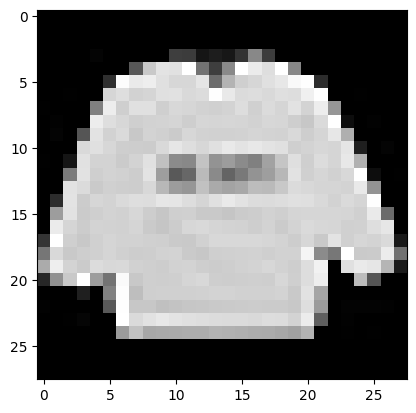

In [ ]:
# Imprimindo um objeto do dataset
plt.imshow(data.values[0][1:].reshape(28,28), cmap='gray', interpolation='none')
plt.show()

### A atividade consiste em utilizar o KNN para classificar as imagens do fmnist

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
(traindata, testdata, trainlabel, testlabel) = train_test_split(np.array(data[data.columns.difference(['label'])]), data['label'], test_size=0.2, random_state=42)

In [ ]:
print("training data points: {}".format(len(trainlabel)))
print("testing data points: {}".format(len(testlabel)))

training data points: 48000
testing data points: 12000


In [ ]:
kVal = range(1,30,2)
acuracia = []

In [ ]:
for k in kVal:
  model = KNeighborsClassifier(n_neighbors = k, metric='euclidean')
  model.fit(traindata, trainlabel)
  score = model.score(testdata, testlabel)
  print("k=%d, accuracy=%.2f%%" % (k, score * 100))
  acuracia.append(score)

k=1, accuracy=84.86%
k=3, accuracy=85.62%
k=5, accuracy=85.58%
k=7, accuracy=85.52%
k=9, accuracy=85.31%
k=11, accuracy=84.87%
k=13, accuracy=84.62%
k=15, accuracy=84.42%
k=17, accuracy=84.47%
k=19, accuracy=84.29%
k=21, accuracy=84.05%
k=23, accuracy=83.96%
k=25, accuracy=83.85%
k=27, accuracy=83.82%
k=29, accuracy=83.72%


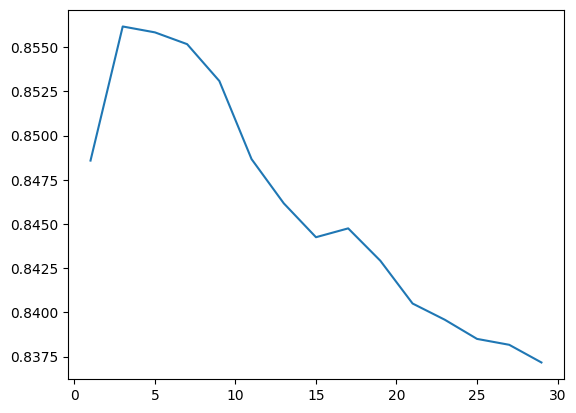

In [ ]:
plt.plot(kVal, acuracia)
plt.show()

In [ ]:
model = KNeighborsClassifier(n_neighbors = 3, metric ='euclidean')
model.fit(traindata, trainlabel)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

Dado:


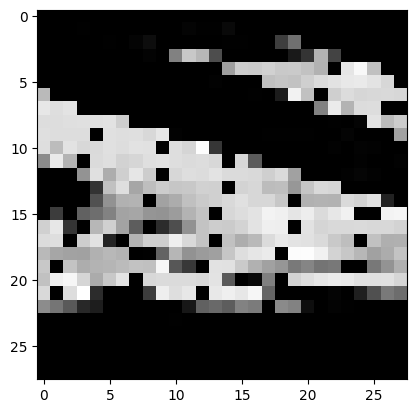

Correto: 9
Predição: 9


Dado:


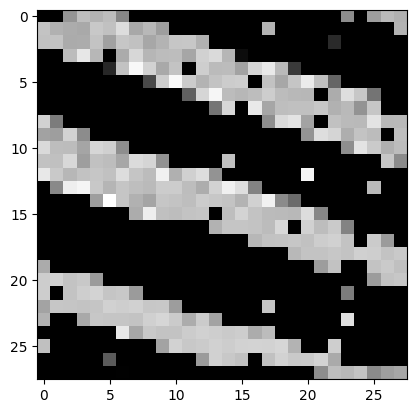

Correto: 4
Predição: 4


Dado:


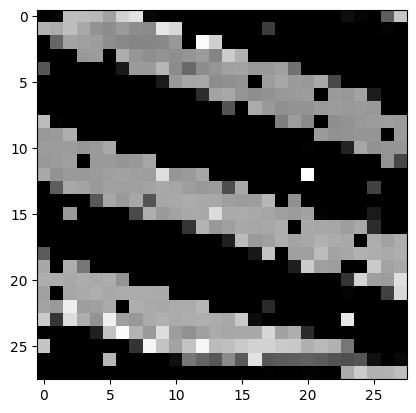

Correto: 0
Predição: 0


Dado:


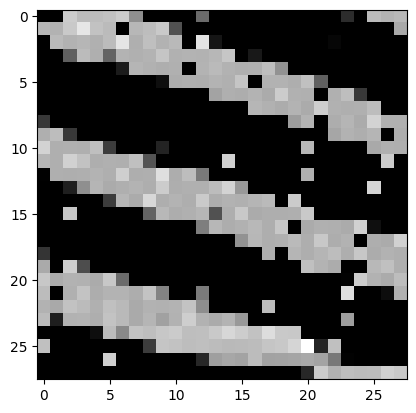

Correto: 6
Predição: 6


Dado:


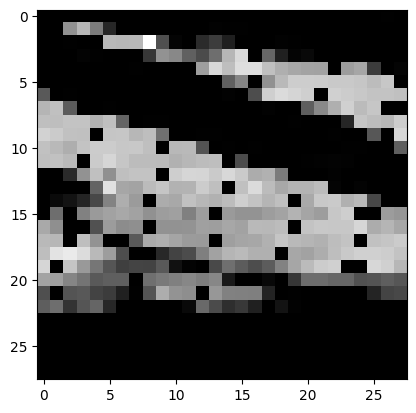

Correto: 9
Predição: 9




In [ ]:
#lista com as linhas que ele vai tentar prever o que é
pL = [4, 35, 28, 7, 18]
predi = model.predict(testdata[pL,:])
i = 0
for x in predi:
  print("Dado:")
  plt.imshow(testdata[pL[i],:].reshape(28,28), cmap='gray', interpolation='none')
  plt.show()
  print(f'Correto: {testlabel.values[pL[i]]}')
  print(f'Predição: {x}')
  print('\n')
  i+=1